In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [73]:
# Load the dataset
df = pd.read_csv('BMD-1.csv')
df.head()

,id,age,weight_kg,height_cm,bmd,fracture
0,469,57.052768,64.0,155.5,0.8793,no fracture
1,8724,75.741225,78.0,162.0,0.7946,no fracture
2,6736,70.778900,73.0,170.5,0.9067,no fracture
3,24180,78.247175,60.0,148.0,0.7112,no fracture
4,17072,54.191877,55.0,161.0,0.7909,no fracture


# Exploratory Data Analysis

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


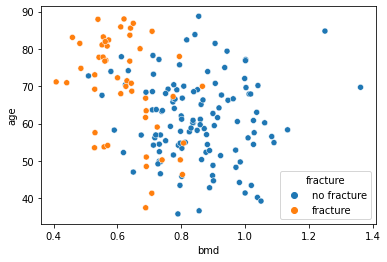

In [74]:
sns.scatterplot(df.bmd, df.age, hue=df.fracture)
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


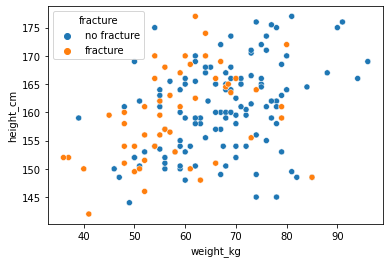

In [75]:
sns.scatterplot(df.weight_kg, df.height_cm, hue=df.fracture)
plt.show()

In [76]:
# To see the distribution of the dataset.
df.fracture.value_counts()

no fracture    119
fracture        50
Name: fracture, dtype: int64

#### Imbalanced dataset - 119 and 50. One class has more weight than the other class. 

To handle imbalanced dataset, we can:
1. Reduce the size of larger class
2. Add to smaller class

#### In this analysis, we will reduce the size of larger class.

### Separate majority and minority classes


In [77]:
df_majority = df[df['fracture'] == 'no fracture']
print(df_majority)

        id        age  weight_kg  height_cm     bmd     fracture
0      469  57.052768       64.0      155.5  0.8793  no fracture
1     8724  75.741225       78.0      162.0  0.7946  no fracture
2     6736  70.778900       73.0      170.5  0.9067  no fracture
3    24180  78.247175       60.0      148.0  0.7112  no fracture
4    17072  54.191877       55.0      161.0  0.7909  no fracture
..     ...        ...        ...        ...     ...          ...
114   2306  57.569180       74.0      176.0  1.0287  no fracture
115    446  56.964458       64.5      162.0  0.7201  no fracture
116   6602  52.246552       64.0      168.0  0.6187  no fracture
117  23873  56.931266       60.0      159.0  0.6744  no fracture
118   8892  66.335623       62.0      150.5  0.8681  no fracture

[119 rows x 6 columns]


In [78]:
df_minority = df[df['fracture'] == 'fracture']
print(df_minority)

        id        age  weight_kg  height_cm     bmd  fracture
119    165  83.093647       52.0      156.0  0.4586  fracture
120    690  81.481370       54.0      154.0  0.4818  fracture
121   5350  53.531717       69.0      163.5  0.5279  fracture
122    434  69.213935       56.0      157.0  0.5285  fracture
123    278  73.067598       54.0      166.0  0.5287  fracture
124   2029  87.934942       57.0      156.5  0.5387  fracture
125    103  77.768677       61.0      150.0  0.5419  fracture
126    382  81.087385       50.0      149.5  0.5515  fracture
127  23919  53.769290       40.0      150.0  0.5579  fracture
128   5348  80.773193       79.0      159.0  0.5676  fracture
129    224  76.944737       37.0      152.0  0.5635  fracture
130   2458  82.407179       48.0      158.0  0.5721  fracture
131    322  57.581198       36.0      152.0  0.5294  fracture
132    302  77.819623       48.0      151.0  0.5547  fracture
133     67  76.745516       52.0      146.0  0.5603  fracture
134   43

In [97]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=96) 

# Combining minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

,id,age,weight_kg,height_cm,bmd,fracture
68,8896,51.596540,54.0,154.0,0.7755,no fracture
111,23790,52.478311,59.0,150.5,0.7314,no fracture
40,55,73.230427,52.0,153.0,0.7128,no fracture
49,5509,76.863915,88.0,167.0,1.0015,no fracture
83,8999,60.236582,70.0,158.0,0.8362,no fracture


#### Now we have a perfectly balanced data.

In [98]:
df_downsampled.fracture.value_counts()

no fracture    50
fracture       50
Name: fracture, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


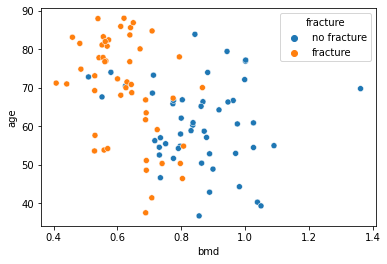

In [94]:
#EDA
sns.scatterplot(df_downsampled.bmd, df_downsampled.age, hue=df_downsampled.fracture)
plt.show()

# Split to X & Y 

In [83]:
# Set Features and Target Variable
x = df_downsampled[['age', 'weight_kg','height_cm','bmd']]
y = df_downsampled['fracture']

### Data sampling
1. Cross Validation
2. Random Sampling

#### For this analysis, we will choose Random Sampling ie. spliting the data into training and testing set.

# Split to training and testing sets

In [84]:
# Split Features and Target Variables into Train and Test Sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

### Logistic Regression

* Supervised learning algorithm ie labelled data & predicting outcome 
* Used for binary classification problems ie. target variable can take"yes" or "no"
* Dependent var is Categorical.

In the given dataset, dependent var is "fraction" or "no fracture".

# Creating LR Model

Logistic Regression has several optional parameters that define the behavior of the model and approach:

* penalty ('l2' by default)
L1 - Lasso ie. significant var included ;
L2 - Ridge ie. all var included.

* solver ('liblinear' by default)


In [99]:
#model_LR = LogisticRegression(penalty='l2',solver='liblinear')
#model_LR = LogisticRegression()

model_LR = LogisticRegression(penalty='l1',solver='liblinear')


# Model Fitting

In [100]:
# Fit the model using training data
model_LR.fit(x_train,y_train)

#model_LR = LogisticRegression().fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

# Attributes of your model

In [101]:
model_LR.classes_

array(['fracture', 'no fracture'], dtype=object)

In [103]:
model_LR.intercept_

array([0.])

In [104]:
#'age', 'weight_kg','height_cm','bmd'
model_LR.coef_

array([[-0.04795185,  0.04718005, -0.03750378,  8.016952  ]])


'age', 'weight_kg','height_cm','bmd'
[-0.06565048,  0.07343144, -0.01319469,  2.04643132]

The coef that is most important in determining fracture is : BMD has a higher coef of 2.04643132.

# Prediction on Test data

In [105]:
y_predict = model_LR.predict(x_test)

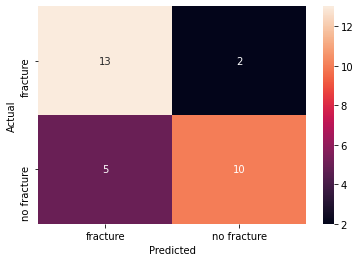

In [106]:
confusion_matrix = pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

#### 11+10 correct predictions (21 correctly clasified patients) and 5+4 incorrect predictions (9 incorrectly classified patients).

So, the classifier made 11 correct predictions for the "fracture" class and 10 correct predictions for the "no fracture" class. 
It made 5 incorrect predictions for the "fracture" class, which were classified as "no fracture", and 4 incorrect predictions for the "no fracture" class, which were classified as "fracture".



# Evaluate the Model

* Accuracy Score
* Classification report


In [107]:
accuracy = metrics.accuracy_score(y_test,y_predict)
print(accuracy)

0.7666666666666667


Accuracy is the proportion of the total number of predictions that were correct. 

* Accuracy of logistic regression classifier on test set is 0.7.

In [108]:
cr = classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

    fracture       0.72      0.87      0.79        15
 no fracture       0.83      0.67      0.74        15

    accuracy                           0.77        30
   macro avg       0.78      0.77      0.76        30
weighted avg       0.78      0.77      0.76        30



Precision: 
* Fracture class, precision is 0.69 ie. 69% of the cases predicted as fracture were actually fracture. 
* No fracture class, precision is 0.71 ie. 71% of the cases predicted as no fracture were actually no fracture.

Recall: 
* Fracture class, recall is 0.73 ie. 73% of the actual fracture cases were correctly identified. 
* No fracture class, recall is 0.67 ie. 67% of the actual no fracture cases were correctly identified.

F1-score:
* Fracture class, F1-score is 0.71. 
* No fracture class, F1-score is 0.69.

Accuracy:
The model has an accuracy of 70% which means it correctly predicted "fracture" or "no fracture" in 21 out of 30 patients.

The model's performance is ok with an accuracy of 0.7.